In [37]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
CTDF = pd.read_csv(city_data_to_load)
RDDF = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
MGDF = pd.merge(CTDF,RDDF,on="city")

# Display the data table for preview
MGDF.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

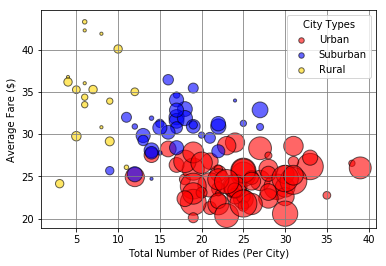

In [38]:
# Obtain the x and y coordinates for each of the three city types
MGDF2 = MGDF.groupby(['type','city'])
BPDF = MGDF2.mean()
BPDF['ride_count'] = MGDF2['ride_id'].count()
BPDF = BPDF.drop(columns=['ride_id'])
BPDF.index.get_level_values(0).unique().tolist()
urban = BPDF[BPDF.index.get_level_values(0) == 'Urban']
rural = BPDF[BPDF.index.get_level_values(0) == 'Rural']
suburban = BPDF[BPDF.index.get_level_values(0) == 'Suburban']


# Build the scatter plots for each city types
# Incorporate the other graph properties
plt.scatter(urban['ride_count'],urban['fare'],s = 10*urban['driver_count'], alpha = 0.6, marker='o', edgecolors='k', color = 'red',label='Urban')
plt.scatter(suburban['ride_count'],suburban['fare'],s = 10*suburban['driver_count'], alpha = 0.6, marker='o', edgecolors='k', color = 'blue',label='Suburban')
plt.scatter(rural['ride_count'],rural['fare'],s = 10*rural['driver_count'], alpha = 0.6, marker='o', edgecolors='k', color = 'gold',label='Rural')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(color='grey')

# Create a legend
# Incorporate a text regaridng circle size
lgd = plt.legend(title="City Types")
for i in range(3):
    lgd.legendHandles[i]._sizes = [30]

# Save Figure
plt.savefig('BubblePlot_RideSharing.png')

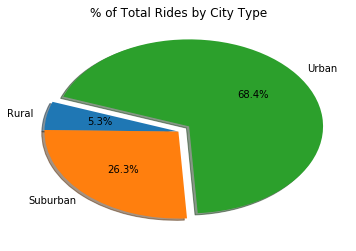

In [42]:
BPDF = BPDF.reset_index()
sums = BPDF.ride_count.groupby(BPDF.type).sum()
explode = (0,0,0.1)
plt.figure()
plt.pie(sums, labels=sums.index, explode=explode, autopct="%1.1f%%", shadow = True, startangle = 160)
plt.title('% of Total Rides by City Type')
plt.show()

## Total Drivers by City Type

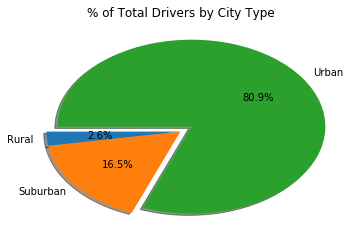

In [41]:
# Calculate Driver Percents
MGDF3 = MGDF.groupby(['type','city']).mean()
MGDF3 = MGDF3.drop(columns=['fare','ride_id'])
MGDF3 = MGDF3.reset_index()
MGDF3


sums2 = MGDF3.driver_count.groupby(MGDF3.type).sum()
explode = (0,0,0.1)
plt.figure()
plt.pie(sums2, labels=sums2.index, explode=explode, autopct="%1.1f%%", shadow = True, startangle = 180)
plt.title('% of Total Drivers by City Type')
plt.show()